## Conventions
* スペルミス，大文字，小文字，句読点の間違い

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### pyspellchecker
* 句読点を全て削除してからが良さそう

In [4]:
%%capture
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.0 MB/s eta 0:00:00a 0:00:01


In [5]:
from spellchecker import SpellChecker

spell = SpellChecker()

In [6]:
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happening
{'happening', 'henning', 'penning'}


In [9]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
text = df['full_text']

In [13]:
text[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [20]:
# 改行の削除
new_text = text[0].replace('\n', '')
# 句読点を抜く
new_text = new_text.replace('.', ' ')
new_text = new_text.replace(',', ' ')

In [21]:
new_text

"I think that students would benefit from learning at home because they wont have to change and get up early in the morning to shower and do there hair  taking only classes helps them because at there house they'll be pay more attention  they will be comfortable at home The hardest part of school is getting ready  you wake up go brush your teeth and go to your closet and look at your cloths  after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain  Then you'll have to change  with the online classes you can wear anything and stay home and you wont need to stress about what to wear most students usually take showers before school  they either take it before they sleep or when they wake up  some students do both to smell good  that causes them do miss the bus and effects on there lesson time cause they come late to school  when u have online classes u wont need to miss lessons cause you can get everything set up and go take a sh

In [22]:
text_words = new_text.split()
print(text_words)

['I', 'think', 'that', 'students', 'would', 'benefit', 'from', 'learning', 'at', 'home', 'because', 'they', 'wont', 'have', 'to', 'change', 'and', 'get', 'up', 'early', 'in', 'the', 'morning', 'to', 'shower', 'and', 'do', 'there', 'hair', 'taking', 'only', 'classes', 'helps', 'them', 'because', 'at', 'there', 'house', "they'll", 'be', 'pay', 'more', 'attention', 'they', 'will', 'be', 'comfortable', 'at', 'home', 'The', 'hardest', 'part', 'of', 'school', 'is', 'getting', 'ready', 'you', 'wake', 'up', 'go', 'brush', 'your', 'teeth', 'and', 'go', 'to', 'your', 'closet', 'and', 'look', 'at', 'your', 'cloths', 'after', 'you', 'think', 'you', 'picked', 'a', 'outfit', 'u', 'go', 'look', 'in', 'the', 'mirror', 'and', 'youll', 'either', 'not', 'like', 'it', 'or', 'you', 'look', 'and', 'see', 'a', 'stain', 'Then', "you'll", 'have', 'to', 'change', 'with', 'the', 'online', 'classes', 'you', 'can', 'wear', 'anything', 'and', 'stay', 'home', 'and', 'you', 'wont', 'need', 'to', 'stress', 'about', 'w

#### ミススペルをカウントする関数

In [36]:
def misspell_count(text):
    # 改行の削除
    text = text.replace('\n', '')
    # 句読点を抜く
    text = text.replace('.', ' ')
    text = text.replace(',', ' ')
    text_words = text.split()
    misspelled = spell.unknown(text_words)
    count = 0
    for word in misspelled:
        count += 1
        # スペルミス
        #print(word)
        # 最も可能性の高い単語
        #print(spell.correction(word))
    #print(count)
    return count 

In [37]:
miss_count = []

for i in range(3911):
    check_text = text[i]
    m_count = misspell_count(check_text)
    miss_count.append(m_count)

#miss_count

#### 各目的変数ごとの平均

In [52]:
df['miss_count'] = miss_count

In [53]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,miss_count
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,1
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,4
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,4
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,7


In [57]:
df.groupby(['conventions'])['miss_count'].mean()

conventions
1.0    23.600000
1.5    12.650000
2.0    11.584577
2.5     7.875000
3.0     6.005213
3.5     4.924009
4.0     4.043388
4.5     4.278689
5.0     5.560000
Name: miss_count, dtype: float64

In [58]:
df.groupby(['grammar'])['miss_count'].mean()

grammar
1.0    18.500000
1.5    15.850000
2.0     8.389706
2.5     7.203509
3.0     6.389336
3.5     5.575000
4.0     4.897092
4.5     4.873134
5.0     5.241379
Name: miss_count, dtype: float64

In [59]:
df.groupby(['phraseology'])['miss_count'].mean()

phraseology
1.0    12.100000
1.5    11.363636
2.0     9.100000
2.5     7.246114
3.0     6.283608
3.5     5.779333
4.0     5.450271
4.5     5.842593
5.0     6.200000
Name: miss_count, dtype: float64

In [60]:
df.groupby(['vocabulary'])['miss_count'].mean()

vocabulary
1.0     4.000000
1.5    16.285714
2.0     9.846774
2.5     7.954545
3.0     6.516966
3.5     5.649454
4.0     5.915078
4.5     5.321739
5.0     6.658537
Name: miss_count, dtype: float64

In [61]:
df.groupby(['syntax'])['miss_count'].mean()

syntax
1.0    15.727273
1.5    13.379310
2.0     8.041463
2.5     7.519666
3.0     6.248000
3.5     5.572088
4.0     5.237113
4.5     4.870000
5.0     6.588235
Name: miss_count, dtype: float64

In [63]:
df.groupby(['cohesion'])['miss_count'].mean()

cohesion
1.0    23.200000
1.5    13.259259
2.0     7.390476
2.5     7.482278
3.0     6.290146
3.5     6.001012
4.0     5.644195
4.5     4.840000
5.0     6.461538
Name: miss_count, dtype: float64

#### 相関係数

In [67]:
miss_count = np.array(miss_count)
col_list = ['cohesion', 'syntax', 'vocabulary','phraseology', 'grammar', 'conventions']
for i in col_list:
    conv = df[i].to_numpy()
    print(np.corrcoef(miss_count, conv))

[[ 1.         -0.13592749]
 [-0.13592749  1.        ]]
[[ 1.         -0.16417243]
 [-0.16417243  1.        ]]
[[ 1.         -0.13151652]
 [-0.13151652  1.        ]]
[[ 1.         -0.14528788]
 [-0.14528788  1.        ]]
[[ 1.         -0.18643643]
 [-0.18643643  1.        ]]
[[ 1.         -0.32957541]
 [-0.32957541  1.        ]]


In [ ]:
miss_df = pd.DataFrame(con)

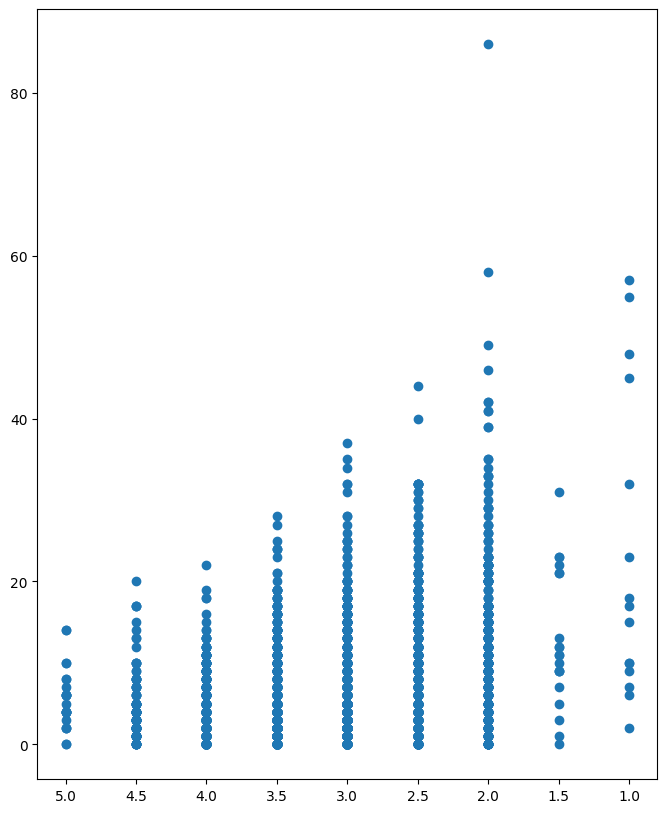

In [68]:
fig, ax = plt.subplots(figsize=(8.0, 10.0))
#fig = plt.figure(figsize=(14,8))
#ax = sns.jointplot(x = conv, y = miss_count, color = "#6495ED")
ax.scatter(conv, miss_count)
ax.invert_xaxis()

In [25]:
misspelled = spell.unknown(text_words)

for word in misspelled:
    # スペルミス
    print(word)
    # 最も可能性の高い単語
    print(spell.correction(word))

In [24]:
misspelled

set()

### PyEnchant(使えていない)
* pythonのスペルチェッカー

In [2]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://security.debian.org/debian-security buster/updates/main arm64 Packages [375 kB]
Get:5 http://deb.debian.org/debian buster/main arm64 Packages [7737 kB]
Get:6 http://deb.debian.org/debian buster-updates/main arm64 Packages [8780 B]
Fetched 8334 kB in 1s (7703 kB/s)3m                       
Reading package lists... Done
Building dependency tree       
Reading state information... Done
109 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.7-0 libtext-iconv-perl
Suggested packages:
  aspell-do

In [8]:
#%%capture
!pip install pyenchant

In [3]:
import enchant
d = enchant.Dict("en_US")
d.check("Hello")

ImportError: The 'enchant' C library was not found and maybe needs to be installed.
See  https://pyenchant.github.io/pyenchant/install.html
for details


In [ ]:
d.check("Helo")